In [88]:
import os, os.path

#os.chdir(r"D:\1. Projects\42. LAC Decarbonization\lac_decarbonization-servidor-05082022\lac_decarbonization-main\python")

import numpy as np
import pandas as pd
import model_attributes as ma
from attribute_table import AttributeTable
import setup_analysis as sa
import support_functions as sf
import argparse
import warnings
import matplotlib.pyplot as plt
from model_socioeconomic import Socioeconomic
import model_afolu as mafl
from model_circular_economy import CircularEconomy
from model_ippu import IPPU




In [26]:
#df_exp
df_base = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_complete.csv"))
#df_base = pd.read_csv("/Users/jsyme/Downloads/data_complete_future_2022_09_30_test.csv")

In [28]:
#df_base["ef_fgtv_production_fugitive_tonne_ch4_per_m3_fuel_coal"]


In [167]:

#load

#dir_input_data = r"D:\1. Projects\42. LAC Decarbonization\lac_decarbonization-servidor-20062022\lac_decarbonization\ref\fake_data"
#name_file = "fake_data_complete.csv"
#df_input_data =  pd.read_csv(dir_input_data+name_file)

#model_ippu = IPPU(sa.model_attributes)
#df_model_data_project = model_ippu.project(df_input_data)


#load transformations files

#load combinations of transformations to be run
dir_input_transformations = "/Users/jsyme/Downloads/Nation_level_2025"
fp_input_data = "/Users/jsyme/Downloads/data_complete_future_2022_09_30_test.csv"
exp_file =  "transformations_experiment.csv"
df_exp =  pd.read_csv(os.path.join(dir_input_transformations, exp_file))


#load individual transformation files
#NOTE:the best approch is to used the calibrated parameter as a the baseline value and then have the transformation multiply that parameter

#rice management
rice_mgt =  "rice_mgt.csv"
df_rice =  pd.read_csv(os.path.join(dir_input_transformations, rice_mgt))

#Crop productivity
crop_productivity =  "Improve_Crop_Productivity.csv"
df_cproductivity =  pd.read_csv(os.path.join(dir_input_transformations, crop_productivity))

#Crop productivity with Lu gains
crop_productivityLUgains =  "Improve_Crop_Productivity_wlugains.csv"
df_cproductivityLUgains =  pd.read_csv(os.path.join(dir_input_transformations, crop_productivityLUgains))

#live stock productivity
lvst_productivity =  "Improving_Livestock_Productivity.csv"
df_lproductivity =  pd.read_csv(os.path.join(dir_input_transformations, lvst_productivity))

#live stock productivity with LUgains
lvst_productivityLUgains =  "Improving_Livestock_Productivity_wlugains.csv"
df_lproductivityLUgains =  pd.read_csv(os.path.join(dir_input_transformations, lvst_productivityLUgains))

#improving diets
new_diets =  "Improving_Diets.csv"
df_ndiets =  pd.read_csv(os.path.join(dir_input_transformations, new_diets))

#improving diets with lu gains
new_dietsLUgains =  "Improving_Diets_wlugains.csv"
df_ndietsLUgains =  pd.read_csv(os.path.join(dir_input_transformations, new_dietsLUgains))

#enteric fermentation
enteric_fermentation =  "reducing_entering_fermentation.csv"
df_efermentation =  pd.read_csv(os.path.join(dir_input_transformations, enteric_fermentation))

#conservation agriculture
conservation_agriculture =  "expand_conservation_agriculture.csv"
df_cagg =  pd.read_csv(os.path.join(dir_input_transformations, conservation_agriculture))

#reducing food losses
reducing_flosses =  "reducing_food_losses_supply_chain.csv"
df_fl=  pd.read_csv(os.path.join(dir_input_transformations, reducing_flosses))

#reducing food losses wit lu gains
reducing_flossesLUgains =  "reducing_food_losses_supply_chain_wlugains.csv"
df_flLUgains=  pd.read_csv(os.path.join(dir_input_transformations, reducing_flossesLUgains))

#managing manure
manure_management =  "managing_manure.csv"
df_mm=  pd.read_csv(os.path.join(dir_input_transformations, manure_management))

#silvopasture systems
silvopasture =  "SilvoPasture_new.csv"
df_sp=  pd.read_csv(os.path.join(dir_input_transformations, silvopasture))

#silvopasture systems with land use gains
silvopastureLUgains =  "SilvoPasture_new_wlugains.csv"
df_spLUgains=  pd.read_csv(os.path.join(dir_input_transformations, silvopastureLUgains))


#rehabilitating degraded land
rehabilitate_land =  "Rehabilitating_degraded_land.csv"
df_rhl=  pd.read_csv(os.path.join(dir_input_transformations, rehabilitate_land))

#reduce excess fertilizer
excess_fertilizer =  "reduce_excess_fertilizer.csv"
df_exf=  pd.read_csv(os.path.join(dir_input_transformations, excess_fertilizer))

#improve fertlizer app
improveapp_fertilizer =  "improve_fertilizer_app.csv"
df_impf=  pd.read_csv(os.path.join(dir_input_transformations, improveapp_fertilizer))

#reduce amounts grown
#reduce_production =  "Reducing_agg_lvst_grown.csv"
#df_rp=  pd.read_csv(os.path.join(dir_input_transformations, reduce_production)

#reduce deforestation
reduce_deforestation =  "Reducing_deforestation.csv"
df_rd=  pd.read_csv(os.path.join(dir_input_transformations, reduce_deforestation))

#none with land use gains
noneLUgains = "none_wlugains.csv"
df_nLUgains = pd.read_csv(os.path.join(dir_input_transformations, noneLUgains))


#list all policies
policies = np.unique(df_exp['Policy_ID'])
#policy_names = np.unique(df_exp['Policy_name'])
#load calibration parameters
#name_file = "data_complete_future_2022_08_03_test4.csv"
#name_file = "data_complete_future_2022_08_24_test1.csv"
#dir_calib_data = r"C:\Users\AP03054557\OneDrive\Edmundo-ITESM\3.Proyectos\42. LAC Decarbonization\Git-LAC-Calib\lac_decarbonization\calibration\AFOLU\CalibrationVectors"
df_data_calib = pd.read_csv(fp_input_data)

#dir_input_new = r"D:\1. Projects\42. LAC Decarbonization\lac_decarbonization-servidor-15072022\lac_decarbonization-main\ref\fake_data"
#name_file = "fake_data_complete.csv"
#df_input_new = pd.read_csv(dir_input_new+name_file)

#aggregate results to obtain mean values of calibration
#df_data_calib = df_data_calib.groupby(["nation"]).mean()
#df_data_calib['nation'] = df_data_calib.index

#check column names, always check if calib and policy parameters are interrelated
#df_sot.columns.isin(df_data_calib.columns)
#df_sot.columns[df_sot.columns.isin(df_data_calib.columns)==True]


#list all nations in  data calib
nations = np.unique(df_data_calib['Nation'])

#Initialize loop
df_all = []
dict_dat = {}
for policy in [0, 20]:#policies:
    dict_dat.update({policy: {}})
    
    for i in ["brazil"]:# nations[0:8]:
        #policy = policies[0]
        #i= 'argentina'
        #i = 'brazil'
        #i = 'chile'
        #i = 'mexico'
        #load transformation tables
        #rice management
        trice = list(df_exp[df_exp['Policy_ID']==policy]['rice_management'])[0]
        df_trice = df_rice[(df_rice['TransformationName']==trice) & (df_rice["Nation"]==i)]

        #crop productivity
        tcproductivity = list(df_exp[df_exp['Policy_ID']==policy]['Improve_Crop_Productivity'])[0]
        df_tcproductivity = df_cproductivity[(df_cproductivity['TransformationName']==tcproductivity) & (df_cproductivity["Nation"]==i)]

        #crop productivity with LU gains
        tcproductivityLUgains = list(df_exp[df_exp['Policy_ID']==policy]['Improve_Crop_Productivity_wlugains'])[0]
        df_tcproductivityLUgains = df_cproductivityLUgains[(df_cproductivityLUgains['TransformationName']==tcproductivityLUgains) & (df_cproductivityLUgains["Nation"]==i)]

        #live stock productivity
        tlproductivity = list(df_exp[df_exp['Policy_ID']==policy]['Improve_lvst_Productivity'])[0]
        df_tlproductivity = df_lproductivity[(df_lproductivity['TransformationName']==tlproductivity) & (df_lproductivity["Nation"]==i)]

        #live stock productivity with LU gains
        tlproductivityLUgains = list(df_exp[df_exp['Policy_ID']==policy]['Improve_lvst_Productivity_wlugains'])[0]
        df_tlproductivityLUgains = df_lproductivityLUgains[(df_lproductivityLUgains['TransformationName']==tlproductivityLUgains) & (df_lproductivityLUgains["Nation"]==i)]

        #new diets
        tndiets = list(df_exp[df_exp['Policy_ID']==policy]['new_diets'])[0]
        df_tndiets = df_ndiets[(df_ndiets['TransformationName']==tndiets) & (df_ndiets["Nation"]==i)]

        #new diets with landu use gains
        tndietsLUgains = list(df_exp[df_exp['Policy_ID']==policy]['new_diets_wlugains'])[0]
        df_tndietsLUgains = df_ndietsLUgains[(df_ndietsLUgains['TransformationName']==tndietsLUgains) & (df_ndietsLUgains["Nation"]==i)]

        #enteric fermentation
        tefermentation = list(df_exp[df_exp['Policy_ID']==policy]['enteric_fermentation'])[0]
        df_tefermentation = df_efermentation[(df_efermentation['TransformationName']==tefermentation) & (df_efermentation["Nation"]==i)]

        #conservation aggriculture
        tcagg = list(df_exp[df_exp['Policy_ID']==policy]['conservation_aggriculture'])[0]
        df_tcagg = df_cagg[(df_cagg['TransformationName']==tcagg) & (df_cagg["Nation"]==i)]

        #reducing food losses
        tfl = list(df_exp[df_exp['Policy_ID']==policy]['reducing_food_losses'])[0]
        df_tfl = df_fl[(df_fl['TransformationName']==tfl) & (df_fl["Nation"]==i)]

        #reducing food losses with land use gains
        tflLUgains = list(df_exp[df_exp['Policy_ID']==policy]['reducing_food_losses_wlugains'])[0]
        df_tflLUgains = df_flLUgains[(df_flLUgains['TransformationName']==tflLUgains) & (df_flLUgains["Nation"]==i)]

        #manure management
        tmm = list(df_exp[df_exp['Policy_ID']==policy]['manure_management'])[0]
        df_tmm = df_mm[(df_mm['TransformationName']==tmm) & (df_mm["Nation"]==i)]

        #silvopasture
        tsp = list(df_exp[df_exp['Policy_ID']==policy]['silvopasture'])[0]
        df_tsp = df_sp[(df_sp['TransformationName']==tsp) & (df_sp["Nation"]==i)]

        #silvopasture with land use gains
        tspLUgains = list(df_exp[df_exp['Policy_ID']==policy]['silvopasture_wlugains'])[0]
        df_tspLUgains = df_spLUgains[(df_spLUgains['TransformationName']==tspLUgains) & (df_spLUgains["Nation"]==i)]

        #rehabilitating land
        trland = list(df_exp[df_exp['Policy_ID']==policy]['rehabilitating_land'])[0]
        df_trhl = df_rhl[(df_rhl['TransformationName']==trland) & (df_rhl["Nation"]==i)]

        #excess fertilizer
        texf = list(df_exp[df_exp['Policy_ID']==policy]['reduce_excess_fertilizer'])[0]
        df_texf = df_exf[(df_exf['TransformationName']==texf) & (df_exf["Nation"]==i)]

        #improve fertlizer app
        timpf = list(df_exp[df_exp['Policy_ID']==policy]['improve_fertilizer_app'])[0]
        df_timpf = df_impf[(df_impf['TransformationName']==timpf) & (df_impf["Nation"]==i)]

        #reduce amounts grown
        #trp = list(df_exp[df_exp['Policy_ID']==policy]['Reducing_agg_lvst_grown'])[0]
        #df_trp = df_rp[(df_rp['TransformationName']==trp) & (df_rp["Nation"]==i)]

        #reduce deforestation
        trd = list(df_exp[df_exp['Policy_ID']==policy]['deforestation'])[0]
        df_trd = df_rd[(df_rd['TransformationName']==trd) & (df_rd["Nation"]==i)]

        #none with land use gains
        tnLUgains = list(df_exp[df_exp['Policy_ID']==policy]['none_wlugains'])[0]
        df_tnLUgains = df_nLUgains[(df_nLUgains['TransformationName']==tnLUgains) & (df_nLUgains["Nation"]==i)]


        #df_input_new = df_input_data.copy(deep=True) #since data calib is now equal to fake_data_complete, no need for an additional file
        #df_input_new = df_data_calib.copy(deep=True)
        df_input_new= df_data_calib[df_data_calib['Nation']==i].copy().reset_index(drop=True)


        #modify input parameters

        #rice management
        target_Tvars = df_trice.columns[df_trice.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_trice[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_trice[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #crop productivity
        target_Tvars = df_tcproductivity.columns[df_tcproductivity.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_trice[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tcproductivity[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #crop productivity with lu gains
        target_Tvars = df_tcproductivityLUgains.columns[df_tcproductivityLUgains.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_trice[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tcproductivityLUgains[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #livestock productivity
        target_Tvars = df_tlproductivity.columns[df_tlproductivity.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_trice[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tlproductivity[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #livestock productivity with LUgains
        target_Tvars = df_tlproductivityLUgains.columns[df_tlproductivityLUgains.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_trice[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tlproductivityLUgains[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #new diets
        target_Tvars = df_tndiets.columns[df_tndiets.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_tndiets[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tndiets[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #new diets with land use gains
        target_Tvars = df_tndietsLUgains.columns[df_tndietsLUgains.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_tndiets[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tndietsLUgains[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #enteric fermentation
        target_Tvars = df_tefermentation.columns[df_tefermentation.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_tndiets[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tefermentation[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #conservation aggriculture
        target_Tvars = df_tcagg.columns[df_tcagg.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_tcagg[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tcagg[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #reducing food losses
        target_Tvars = df_tfl.columns[df_tfl.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_tfl[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tfl[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #reducing food losses with lu gains
        target_Tvars = df_tflLUgains.columns[df_tflLUgains.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_tfl[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tflLUgains[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #manure management
        target_Tvars = df_tmm.columns[df_tmm.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_tfl[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tmm[j])
        del(j)
        del(target_Tvars)

        #silvopasture
        target_Tvars = df_tsp.columns[df_tsp.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_tsp[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tsp[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #silvopasture with land use gains
        target_Tvars = df_tspLUgains.columns[df_tspLUgains.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_tsp[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tspLUgains[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)


        #rehabilitating land
        target_Tvars = df_trhl.columns[df_trhl.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_trhl[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_trhl[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #reduce excess fertilizer
        target_Tvars = df_texf.columns[df_texf.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_texf[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_texf[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #improve fertilizer app
        target_Tvars = df_timpf.columns[df_timpf.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_timpf[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_timpf[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #reducing ammounts grown
        #target_Tvars = df_trp.columns[df_trp.columns.isin(df_input_new.columns)==True]
        #target_Tvars = target_Tvars[target_Tvars!='time_period']
        #target_Tvars = target_Tvars[target_Tvars!='Nation']
        #target_Tvars = target_Tvars[target_Tvars!='lndu_reallocation_factor']
        #for j in target_Tvars:
        #    #df_input_new[target_Tvars[0]] = np.array(df_timpf[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
        #    df_input_new[j] = np.array(df_trp[j])*np.array(df_input_new[j])
        #del(j)
        #del(target_Tvars)
        #df_input_new['lndu_reallocation_factor'] = np.array(df_trp['lndu_reallocation_factor'])

        #reduce deforestation
        target_Tvars = df_trd.columns[df_trd.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_trd[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_trd[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #none with land use gains (the process below has no effect on the run, it used only to structure consistency )
        target_Tvars = df_tnLUgains.columns[df_tnLUgains.columns.isin(df_input_new.columns)==True]
        target_Tvars = target_Tvars[target_Tvars!='time_period']
        target_Tvars = target_Tvars[target_Tvars!='Nation']
        for j in target_Tvars:
            #df_input_new[target_Tvars[0]] = np.array(df_tnLUgains[target_Tvars[0]])*np.array(df_input_new[target_Tvars[0]])
            df_input_new[j] = np.array(df_tnLUgains[j])*np.array(df_input_new[j])
        del(j)
        del(target_Tvars)

        #The lndu_rellocation factor only needs to be altered for some transformations
        if any(map(lambda x: x=="full",[tcproductivityLUgains,tlproductivityLUgains,tndietsLUgains,tflLUgains,tspLUgains,tnLUgains])):
            #new_lndu_reallocation_factor = 1.0 ; remove argentina and chile,
#            df_input_new['lndu_reallocation_factor'] = np.repeat(np.array([0.0,0.5,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]), [1,1,1,1,1,1,1,1,1,1, 26], axis=0)
             #df_input_new['lndu_reallocation_factor'] = np.repeat(np.array([0.0,0.25,0.5,0.75,1.0,1.0]), [10,1,1,1,1,22], axis=0)
              a = np.repeat(np.array([0.0]), [10], axis=0)
              b = np.linspace(start=0, stop=1.0, num=26,axis=0)
              df_input_new['lndu_reallocation_factor'] = np.concatenate([a,b])
        else :
            #new_lndu_reallocation_factor = 0.0
            df_input_new['lndu_reallocation_factor'] = 0.0

        if i=='chile' or i=='argentina':
            df_input_new['lndu_reallocation_factor'] = 0.0
        else:
            df_input_new['lndu_reallocation_factor'] = df_input_new['lndu_reallocation_factor']

        #df_input_new['lndu_reallocation_factor'] = new_lndu_reallocation_factor np.repeat(np.array([0, new_lndu_reallocation_factor]), [10, 26], axis=0)
        #df_input_new['lndu_reallocation_factor'] = np.repeat(np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, new_lndu_reallocation_factor]), [1,1,1,1,1,1,1,1,1,1, 26], axis=0)

        #Re-scale transition probabilities
        #'pij_lndu_forests_primary
        lu_types = ['pij_lndu_croplands','pij_lndu_forests_mangroves','pij_lndu_forests_primary','pij_lndu_forests_secondary','pij_lndu_grasslands','pij_lndu_other','pij_lndu_settlements','pij_lndu_wetlands']
        for j in lu_types:
            #j = lu_types[7]
            scale_names = df_input_new.columns[pd.Series(df_input_new.columns).str.contains(j)]
            sf = df_input_new[scale_names].sum(axis=1)
            df_input_new[scale_names] = df_input_new[scale_names].div(sf, axis=0)
            #print(df_input_new[scale_names].sum(axis=1))
            del(scale_names)
            del(sf)

        #now we used df_input_new to run the model
        df_input_new = df_input_new.sort_values(by = ["time_period"]).reset_index(drop = True)
        cp = [x for x in df_base.columns if x not in df_input_new.columns]
        for x in cp:
            df_input_new[x] = np.array(df_base[x])
        
        dict_dat[policy].update({i: df_input_new})

        #set initial attributes of model ippu
        #model_circecon = CircularEconomy(sa.model_attributes)
        #df_output_data_waste = model_circecon.project(df_input_new)
        #df_input_data = sa.model_attributes.transfer_df_variables(df_input_new,df_output_data_waste,IPPU(sa.model_attributes).integration_variables)
        #df_input_data = pd.merge(df_input_new, df_output_data_waste, how = "left")
        """
        model_afolu = AFOLU(sa.model_attributes)
        #transfer ouput from circular economy
        #run the model
        df_output = model_afolu.project(df_input_new)
        #add ids
        df_output['Nation'] = i
        df_output['policy'] = policy
        df_output['policy_name'] = df_exp[df_exp['Policy_ID']==policy]['Policy_name'].values[0]
        df_all.append(df_output)
        del(df_output)
        del(df_input_new)
        """

#df_all = pd.concat(df_all)



In [132]:
df_exports = pd.read_csv(sa.fp_csv_afolu_import_exports)
df_exports[df_exports["Nation"] == "Brazil"][[x for x in df_exports.columns if x.startswith("exports_lvst")]]

,exports_lvst_buffalo,exports_lvst_cattle_dairy,exports_lvst_cattle_nondairy,exports_lvst_chickens,exports_lvst_goats,exports_lvst_horses,exports_lvst_mules,exports_lvst_pigs,exports_lvst_sheep
45,0.000000,0.0,0.011695,0.139066,7.244589e-06,0.079434,0.000000,0.029674,0.022914
46,0.006521,0.0,0.013061,0.136031,0.000000e+00,0.085446,0.000010,0.036805,0.028611
47,0.003529,0.0,0.016090,0.130474,2.392014e-06,0.063633,0.000000,0.028160,0.038515
48,0.001839,0.0,0.017842,0.124389,0.000000e+00,0.079344,0.000000,0.021379,0.037120
49,0.000000,0.0,0.013413,0.126291,0.000000e+00,0.105106,0.000002,0.020580,0.036220
50,0.000028,0.0,0.014615,0.127500,0.000000e+00,0.106658,0.000000,0.024868,0.026888
51,0.000000,0.0,0.015910,0.120412,2.924602e-07,0.119275,0.000000,0.022391,0.024392
52,0.000000,0.0,0.017579,0.119141,3.727277e-07,0.143012,0.000000,0.019817,0.027111
53,0.000009,0.0,0.016726,0.120026,5.967976e-06,0.091638,0.000003,0.021621,0.027382


In [133]:
#df_output_0[[x for x in df_output_0.columns if "demand_lvst" in x]]
#model_afolu.arr_agrc_frac_feed
#df_input_new_0[[x for x in df_input_new_0.columns if "pop_lvst" in x]]

<AxesSubplot:>

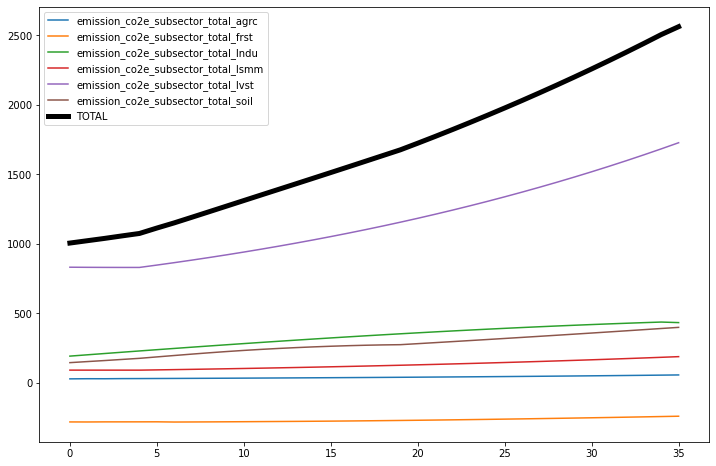

In [173]:
import importlib
importlib.reload(mafl)
model_afolu = mafl.AFOLU(sa.model_attributes)
fields_totals = [x for x in df_output.columns if ("emission_co2e_subsector_total" in x)]# and not (x.endswith("_lvst"))]
field_total = "TOTAL"
warnings.filterwarnings("ignore")

df_output = model_afolu.project(df_input_new)
df_output[field_total] = df_output[fields_totals].sum(axis = 1)

df_input_new_0 = df_input_new.copy()
df_input_new_0["lndu_reallocation_factor"] = 0
df_output_0 = model_afolu.project(df_input_new_0)
df_output_0[field_total] = df_output_0[fields_totals].sum(axis = 1)

fig, ax = plt.subplots(figsize = (12, 8))
df_output_0[fields_totals].plot(ax = ax)
df_output_0[[field_total]].plot(ax = ax, linewidth = 5, c = "black")
#df_input_new[[x for x in df_input_new.columns if "exports_lvst_" in x]]


In [285]:
1 - 729.868258/1727.880844

0.5775934084028771

In [205]:
df_output_0[fields_totals + [field_total]].tail()

,emission_co2e_subsector_total_agrc,emission_co2e_subsector_total_frst,emission_co2e_subsector_total_lndu,emission_co2e_subsector_total_lsmm,emission_co2e_subsector_total_lvst,emission_co2e_subsector_total_soil,TOTAL
31,51.190828,-249.930308,423.828104,169.637546,1558.249657,366.020204,2318.996031
32,52.406592,-247.704913,428.435015,174.037114,1598.845338,374.150757,2380.169902
33,53.664845,-245.444233,432.824866,178.565674,1640.633350,382.359892,2442.604394
34,54.967050,-243.150033,436.995983,183.225783,1683.637270,390.650015,2506.326068
35,56.314698,-240.824079,433.083305,188.020013,1727.880844,398.753437,2563.228217


In [204]:
df_output_1[fields_totals + [field_total]].tail()

,emission_co2e_subsector_total_agrc,emission_co2e_subsector_total_frst,emission_co2e_subsector_total_lndu,emission_co2e_subsector_total_lsmm,emission_co2e_subsector_total_lvst,emission_co2e_subsector_total_soil,TOTAL
31,27.114793,-298.157392,214.473108,75.434341,723.693384,70.085385,812.643619
32,27.050132,-297.811589,247.736356,75.521268,725.310959,70.156586,847.963711
33,26.987360,-297.255217,266.968212,75.605379,726.878464,70.484212,869.668410
34,26.926469,-296.582557,278.260699,75.686752,728.397159,70.881495,883.570017
35,26.867448,-295.847557,277.938875,75.765461,729.868258,71.332665,885.925150


In [249]:
a1 = sa.model_attributes.extract_model_variable(
    df_output_0,
    model_afolu.modvar_lvst_pop,
    return_type = "array_base"
)
d_pop_0 = sa.model_attributes.extract_model_variable(
    df_output_0,
    model_afolu.modvar_lvst_pop
)
d_exp_0 = sa.model_attributes.extract_model_variable(
    df_output_0,
    model_afolu.modvar_lvst_adjusted_equivalent_exports
)
d_imp_0 = sa.model_attributes.extract_model_variable(
    df_output_0,
    model_afolu.modvar_lvst_adjusted_equivalent_imports
)

a2 = sa.model_attributes.extract_model_variable(
    df_output_1,
    model_afolu.modvar_lvst_pop,
    return_type = "array_base"
)
d_pop_1 = sa.model_attributes.extract_model_variable(
    df_output_1,
    model_afolu.modvar_lvst_pop
)
d_exp_1 = sa.model_attributes.extract_model_variable(
    df_output_1,
    model_afolu.modvar_lvst_adjusted_equivalent_exports
)
d_imp_1 = sa.model_attributes.extract_model_variable(
    df_output_1,
    model_afolu.modvar_lvst_adjusted_equivalent_imports
)

flds = [x.replace("pop_lvst_", "percent_reduction_in_0_from_1_") for x in sa.model_attributes.extract_model_variable(
    df_output_0,
    model_afolu.modvar_lvst_pop
).columns]

df = pd.DataFrame(1 - a2/a1, columns = flds)

##  There are large reductions in LVST populations between lndu_reallocation_factor = 0 and lndu_reallocation_factor = 1 (*Note*: demands include a 30% reduction in the fraction of the population of Brazil eating red meat by time_period = 35)

###  The following table shows the percentage reduction in population from lndu_reallocation_factor = 0 and lndu_reallocation_factor = 1 (all else being constant);

###  Note the 61% reduction in dairy cattle and 53% reduction in non-dairy cattle

In [237]:
df.tail()

,percent_reduction_in_0_from_1_buffalo,percent_reduction_in_0_from_1_cattle_dairy,percent_reduction_in_0_from_1_cattle_nondairy,percent_reduction_in_0_from_1_chickens,percent_reduction_in_0_from_1_goats,percent_reduction_in_0_from_1_horses,percent_reduction_in_0_from_1_mules,percent_reduction_in_0_from_1_pigs,percent_reduction_in_0_from_1_sheep
31,0.491124,0.568230,0.489630,0.0,0.483189,0.478070,0.483189,0.0,0.485430
32,0.501971,0.578945,0.500504,0.0,0.493955,0.488924,0.493955,0.0,0.496224
33,0.512698,0.589437,0.511258,0.0,0.504614,0.499663,0.504614,0.0,0.506906
34,0.523297,0.599705,0.521881,0.0,0.515157,0.510275,0.515157,0.0,0.517467
35,0.533760,0.609750,0.532367,0.0,0.525575,0.520756,0.525575,0.0,0.527898


###  Comparing cattle populations shows a significant difference

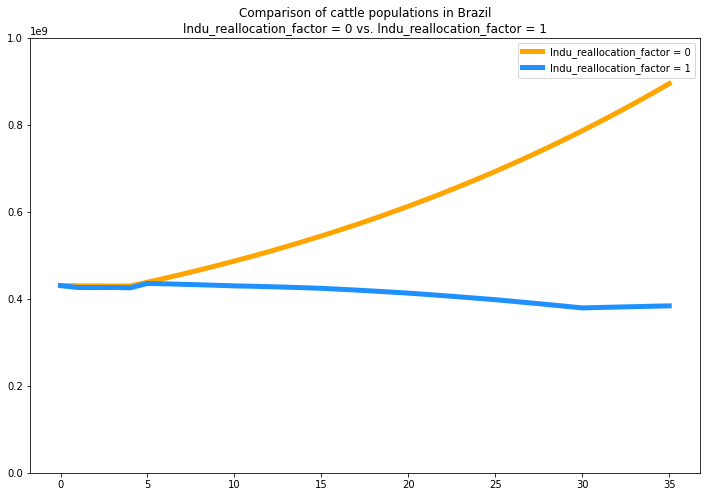

In [290]:
fig, ax = plt.subplots(figsize = (12, 8))
flds_cattle = ["pop_lvst_cattle_dairy", "pop_lvst_cattle_nondairy"]
ax.set_title("Comparison of cattle populations in Brazil\nlndu_reallocation_factor = 0 vs. lndu_reallocation_factor = 1")
ax.set_ylim(0, 10*10**8)
df_output_0[flds_cattle].sum(axis = 1).plot(ax = ax, label = "lndu_reallocation_factor = 0", linewidth = 5, color = "orange")
df_output_1[flds_cattle].sum(axis = 1).plot(ax = ax, label = "lndu_reallocation_factor = 1", linewidth = 5, color = "dodgerblue")
ax.legend()



###  But emissions differences in LVST correspond well with cattle population differences

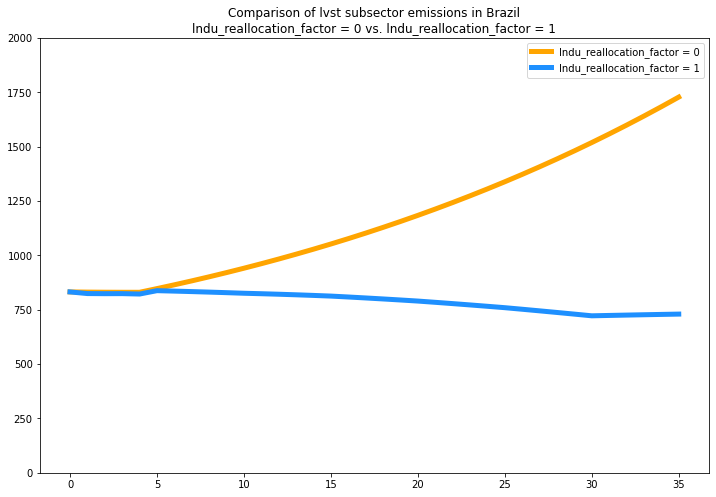

In [295]:
fig, ax = plt.subplots(figsize = (12, 8))
fld_emit_lvst = "emission_co2e_subsector_total_lvst"
ax.set_title("Comparison of lvst subsector emissions in Brazil\nlndu_reallocation_factor = 0 vs. lndu_reallocation_factor = 1")
ax.set_ylim(0, 2000)
df_output_0[fld_emit_lvst].plot(ax = ax, label = "lndu_reallocation_factor = 0", linewidth = 5, color = "orange")
df_output_1[fld_emit_lvst].plot(ax = ax, label = "lndu_reallocation_factor = 1", linewidth = 5, color = "dodgerblue")
ax.legend()



##  Domestic demand remains unchanged under each scenario

###  lndu_reallocation_factor = 0

In [239]:
df_output_0[[x for x in df_output_0.columns if "demand_lvst" in x]].tail()

,demand_lvst_buffalo,demand_lvst_cattle_dairy,demand_lvst_cattle_nondairy,demand_lvst_chickens,demand_lvst_goats,demand_lvst_horses,demand_lvst_mules,demand_lvst_pigs,demand_lvst_sheep
31,1.305344e+06,174219477.0,2.023581e+08,1.250679e+06,9.321961e+06,4.783180e+06,880179.545381,3.713289e+07,1.764559e+07
32,1.310823e+06,174325168.0,2.032075e+08,1.260690e+06,9.365738e+06,4.805644e+06,884312.539592,3.728876e+07,1.772846e+07
33,1.316133e+06,174427136.0,2.040306e+08,1.270494e+06,9.408263e+06,4.827463e+06,888328.533740,3.743978e+07,1.780896e+07
34,1.321276e+06,174525499.0,2.048279e+08,1.280096e+06,9.449567e+06,4.848656e+06,892227.527823,3.758609e+07,1.788714e+07
35,1.326257e+06,174620368.0,2.056000e+08,1.289497e+06,9.489674e+06,4.869235e+06,896014.521843,3.772779e+07,1.796306e+07


###  lndu_reallocation_factor = 1

In [244]:
df_output_1[[x for x in df_output_1.columns if "demand_lvst" in x]].astype(int).tail()

,demand_lvst_buffalo,demand_lvst_cattle_dairy,demand_lvst_cattle_nondairy,demand_lvst_chickens,demand_lvst_goats,demand_lvst_horses,demand_lvst_mules,demand_lvst_pigs,demand_lvst_sheep
31,1305343,174219477,202358138,1250679,9321960,4783180,880179,37132893,17645591
32,1310822,174325168,203207528,1260689,9365737,4805642,884312,37288757,17728458
33,1316132,174427136,204030560,1270493,9408264,4827463,888328,37439784,17808955
34,1321275,174525499,204827863,1280096,9449567,4848656,892227,37586088,17887137
35,1326256,174620368,205600044,1289496,9489673,4869234,896014,37727785,17963056


##  The large differences in lvst populations between scenarios is driven by exports. Massive increases in exports occur under lndu_reallocation = 0 given increases in carrying capacities--i.e.,for every new unit of grassland area provided, Brazil can produce 1.8 as many cattle as before by time_period = 35.

###  Carrying capacity increases by over 80% over time in each scenario. Under lndu_reallocation_factor = 0, which includes increases in available pasture, this leads to a large population + exports

####  lndu_reallocation_factor = 0 - population

In [248]:
d_pop_0.astype(int).tail()

,pop_lvst_buffalo,pop_lvst_cattle_dairy,pop_lvst_cattle_nondairy,pop_lvst_chickens,pop_lvst_goats,pop_lvst_horses,pop_lvst_mules,pop_lvst_pigs,pop_lvst_sheep
31,2569423,403500464,403500463,1462264,18037446,10407683,1703099,38282766,34516532
32,2636410,414020070,414020069,1473330,18507698,10679021,1747500,38444330,35416408
33,2705365,424848733,424848732,1484195,18991765,10958330,1793206,38601087,36342721
34,2776327,435992562,435992561,1494864,19489922,11245768,1840242,38753151,37295995
35,2849335,447457710,447457709,1505336,20002441,11541494,1888634,38900638,38276755


####  Exports are low in the first few time periods (showing lndu_reallocation_factor = 0, but 1 is not significantly different early on)


In [296]:
d_exp_0.astype(int).head()

,exportsadj_lvst_buffalo,exportsadj_lvst_cattle_dairy,exportsadj_lvst_cattle_nondairy,exportsadj_lvst_chickens,exportsadj_lvst_goats,exportsadj_lvst_horses,exportsadj_lvst_mules,exportsadj_lvst_pigs,exportsadj_lvst_sheep
0,0,0,2883951,184093,0,615011,2,834649,723371
1,23099,623812,6461769,185856,174012,703621,16432,1008535,971377
2,22365,877821,6379721,175523,167392,699840,15807,908108,971425
3,20079,1223616,5963663,173672,148539,836807,14027,803717,1019802
4,20588,1764649,6110882,174961,150255,690840,14189,876874,838625


####  lndu_reallocation_factor = 0 - exports (note that cattle exports here make up more than half of the population and are radically higher as a proportion of total production than it was in the first few time periods)

In [252]:
d_exp_0.astype(int).tail()

,exportsadj_lvst_buffalo,exportsadj_lvst_cattle_dairy,exportsadj_lvst_cattle_nondairy,exportsadj_lvst_chickens,exportsadj_lvst_goats,exportsadj_lvst_horses,exportsadj_lvst_mules,exportsadj_lvst_pigs,exportsadj_lvst_sheep
31,1264079,229280987,201308736,211874,8715525,5625400,822919,1161580,17438750
32,1325587,239694902,210980487,212934,9142000,5874283,863187,1167388,18261278
33,1389232,250421597,220987641,213998,9583542,6131781,904877,1173225,19112577
34,1455051,261467063,231335680,215068,10040395,6398035,948014,1179091,19993115
35,1523078,272837342,242030149,216144,10512808,6673191,992619,1184987,20903370


####  lndu_reallocation_factor = 0 - imports

In [253]:
d_imp_0.astype(int).tail()

,importssadj_lvst_buffalo,importssadj_lvst_cattle_dairy,importssadj_lvst_cattle_nondairy,importssadj_lvst_chickens,importssadj_lvst_goats,importssadj_lvst_horses,importssadj_lvst_mules,importssadj_lvst_pigs,importssadj_lvst_sheep
31,0,0,166412,290,39,897,0,11707,567809
32,0,0,167946,293,40,906,0,11815,573328
33,0,0,169469,297,40,914,0,11922,578811
34,0,0,170982,301,40,923,0,12029,584259
35,0,0,172485,305,41,932,0,12135,589672


###  Under lndu_reallocation_factor = 1, increases in carrying capacity lead to significant reudctions in adjusted exports, and we only satisfy exogenously specified exports, leading to a much smaller population

###  lndu_reallocation_factor = 1 - population

In [255]:
d_pop_1.astype(int).tail()

,pop_lvst_buffalo,pop_lvst_cattle_dairy,pop_lvst_cattle_nondairy,pop_lvst_chickens,pop_lvst_goats,pop_lvst_horses,pop_lvst_mules,pop_lvst_pigs,pop_lvst_sheep
31,1307518,174219477,205934601,1462264,9321945,5432083,880181,38282766,17761158
32,1313008,174325168,206801171,1473330,9365722,5457786,884314,38444330,17841923
33,1318329,174427136,207641488,1484195,9408248,5482863,888330,38601087,17920371
34,1323483,174525499,208456180,1494864,9449551,5507329,892229,38753151,17996557
35,1328475,174620368,209245855,1505336,9489657,5531197,896016,38900638,18070531


###  lndu_reallocation_factor = 1 - exports (not that these exports are closer in order of magnitude to historical exports)

In [256]:
d_exp_1.astype(int).tail()

,exportsadj_lvst_buffalo,exportsadj_lvst_cattle_dairy,exportsadj_lvst_cattle_nondairy,exportsadj_lvst_chickens,exportsadj_lvst_goats,exportsadj_lvst_horses,exportsadj_lvst_mules,exportsadj_lvst_pigs,exportsadj_lvst_sheep
31,2174,0,3742874,211874,24,649800,1,1161580,683376
32,2185,0,3761589,212934,24,653049,1,1167388,686793
33,2196,0,3780397,213998,24,656314,1,1173225,690227
34,2207,0,3799299,215068,24,659596,1,1179091,693678
35,2218,0,3818295,216144,24,662894,1,1184987,697146


###  lndu_reallocation_factor = 1 - imports

In [257]:
d_imp_0.astype(int).tail()

,importssadj_lvst_buffalo,importssadj_lvst_cattle_dairy,importssadj_lvst_cattle_nondairy,importssadj_lvst_chickens,importssadj_lvst_goats,importssadj_lvst_horses,importssadj_lvst_mules,importssadj_lvst_pigs,importssadj_lvst_sheep
31,0,0,166412,290,39,897,0,11707,567809
32,0,0,167946,293,40,906,0,11815,573328
33,0,0,169469,297,40,914,0,11922,578811
34,0,0,170982,301,40,923,0,12029,584259
35,0,0,172485,305,41,932,0,12135,589672


##  Finally, we can see the impact of land use reallocation on land use

###  Forested areas increase slightly over time (due to reduced deforestation and increased reforestation) with lndu_reallocation_factor = 1 and reduced demands

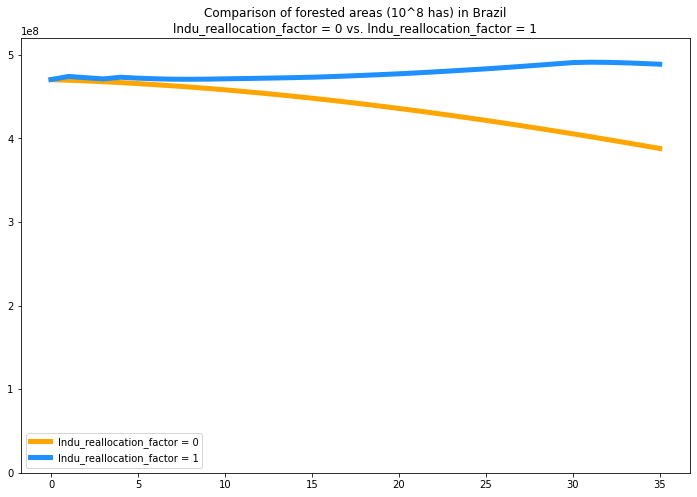

In [275]:
fig, ax = plt.subplots(figsize = (12, 8))
flds_forest_area = [x for x in df_output_1.columns if ("area_lndu" in x) and ("conversion" not in x) and ("forests_" in x)]
ax.set_title("Comparison of forested areas (10^8 has) in Brazil\nlndu_reallocation_factor = 0 vs. lndu_reallocation_factor = 1")
ax.set_ylim(0, 5.2*10**8)
df_output_0[flds_forest_area].sum(axis = 1).plot(ax = ax, label = "lndu_reallocation_factor = 0", linewidth = 5, color = "orange")
df_output_1[flds_forest_area].sum(axis = 1).plot(ax = ax, label = "lndu_reallocation_factor = 1", linewidth = 5, color = "dodgerblue")
ax.legend()



###  Grassland areas increase slightly over time (due to reduced deforestation and increased reforestation) with lndu_reallocation_factor = 1 and reduced demands

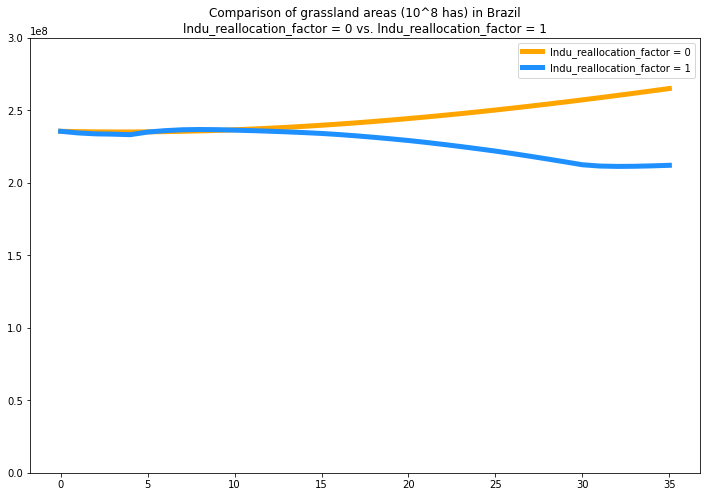

In [274]:
fig, ax = plt.subplots(figsize = (12, 8))
flds_grass_area = [x for x in df_output_1.columns if ("area_lndu" in x) and ("conversion" not in x) and ("grassland" in x)]
ax.set_title("Comparison of grassland areas (10^8 has) in Brazil\nlndu_reallocation_factor = 0 vs. lndu_reallocation_factor = 1")
ax.set_ylim(0, 3*10**8)
df_output_0[flds_grass_area].sum(axis = 1).plot(ax = ax, label = "lndu_reallocation_factor = 0", linewidth = 5, color = "orange")
df_output_1[flds_grass_area].sum(axis = 1).plot(ax = ax, label = "lndu_reallocation_factor = 1", linewidth = 5, color = "dodgerblue")
ax.legend()

###  With the extreme case of lndu_reallocation_factor = 1, **almost all** deforestation is halted (cutting soil carbon losses), and soil carbon stocks increase significantly due to reforestation. Also note that soil carbon losses/sequestration accumulate over time (20 year period), causing some non-linear behaviors.

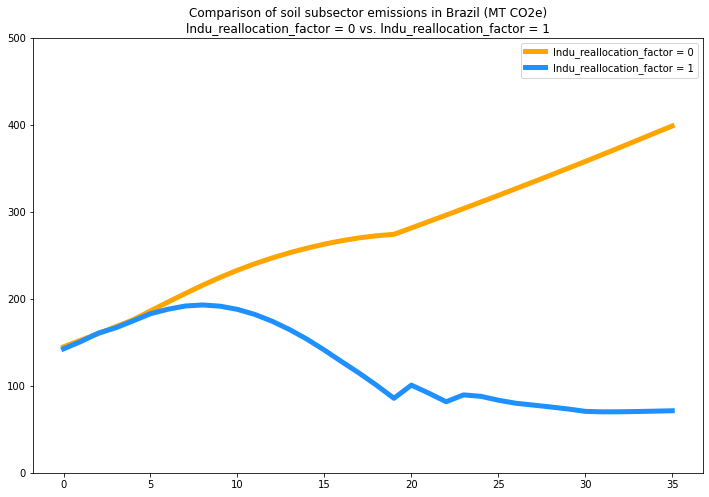

In [278]:
fld_emit_soil = "emission_co2e_subsector_total_soil"
fig, ax = plt.subplots(figsize = (12, 8))
ax.set_title("Comparison of soil subsector emissions in Brazil (MT CO2e)\nlndu_reallocation_factor = 0 vs. lndu_reallocation_factor = 1")
ax.set_ylim(0, 500)
df_output_0[fld_emit_soil].plot(ax = ax, label = "lndu_reallocation_factor = 0", linewidth = 5, color = "orange")
df_output_1[fld_emit_soil].plot(ax = ax, label = "lndu_reallocation_factor = 1", linewidth = 5, color = "dodgerblue")
ax.legend()

<AxesSubplot:>

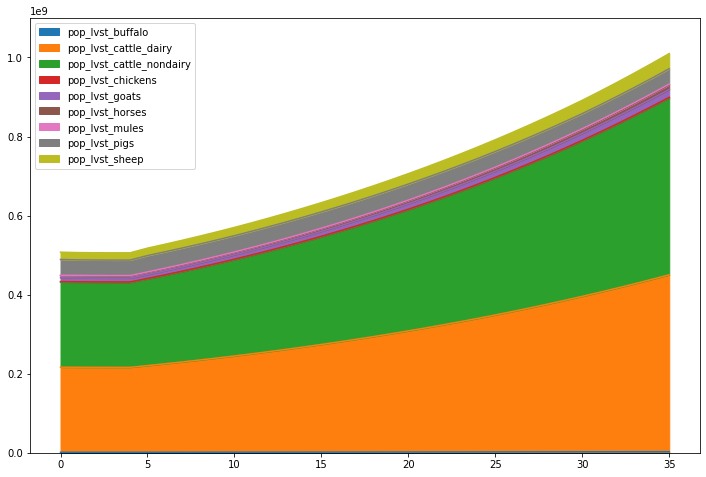

In [221]:
#df_output_0[[x for x in df_output_0.columns if "emission_co2e_ch4_lvst" in x]].tail()
fig, ax = plt.subplots(figsize = (12, 8))
ax.set_ylim(0, 1.1*10**9)
sa.model_attributes.extract_model_variable(
    df_output_0,
    model_afolu.modvar_lvst_pop
).plot.area(ax = ax)

<AxesSubplot:>

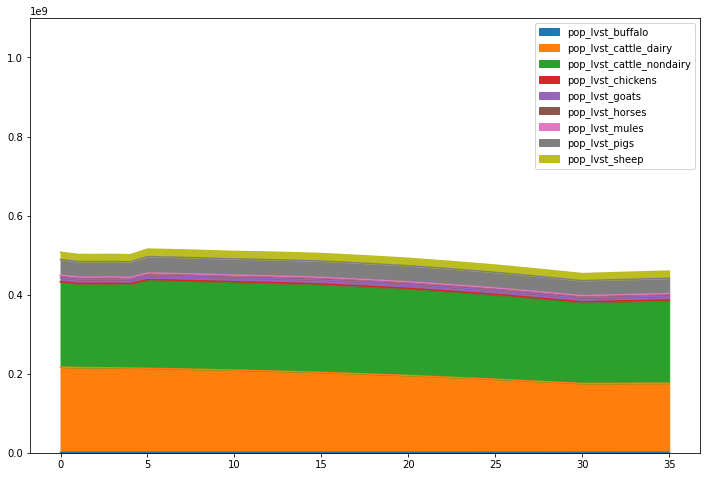

In [220]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.set_ylim(0, 1.1*10**9)
sa.model_attributes.extract_model_variable(
    df_output_1,
    model_afolu.modvar_lvst_pop
).plot.area(ax = ax)

<AxesSubplot:>

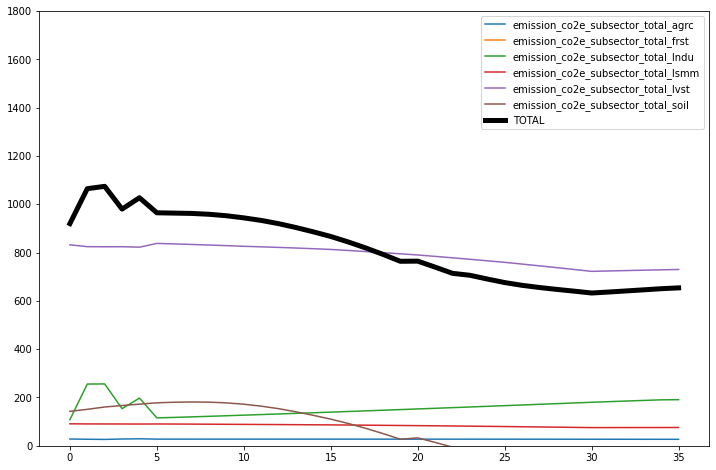

In [322]:
df_input_new_1 = df_input_new.copy()
df_input_new_1["lndu_reallocation_factor"] = 1
#df_input_new_1["scalar_lvst_carrying_capacity"] = 1
df_output_1 = model_afolu.project(df_input_new_1)
df_output_1[field_total] = df_output_1[fields_totals].sum(axis = 1)

fig, ax = plt.subplots(figsize = (12, 8))
ax.set_ylim(0, 1800)
df_output_1[fields_totals].plot(ax = ax)
df_output_1[[field_total]].plot(ax = ax, linewidth = 5, c = "black")

In [328]:
sa.model_attributes.dict_attributes.get("dim_strategy_id").table

,strategy_id,strategy,baseline_strategy_id
0,0,Baseline NDP,1
1,1,Strategy 1 Name,0


In [324]:
df_output_1.tail()

,time_period,frac_area_cropland_calculated_bevs_and_spices,frac_area_cropland_calculated_cereals,frac_area_cropland_calculated_fibers,frac_area_cropland_calculated_fruits,frac_area_cropland_calculated_herbs_and_other_perennial_crops,frac_area_cropland_calculated_nuts,frac_area_cropland_calculated_other_annual,frac_area_cropland_calculated_other_woody_perennial,frac_area_cropland_calculated_pulses,...,demand_soil_synthetic_fertilizer_n_kt,demand_soil_fertilizer_n_kt,emission_co2e_co2_soil_lime_and_urea_use,emission_co2e_subsector_total_agrc,emission_co2e_subsector_total_frst,emission_co2e_subsector_total_lndu,emission_co2e_subsector_total_lsmm,emission_co2e_subsector_total_lvst,emission_co2e_subsector_total_soil,TOTAL
31,31,0.035626,0.205375,0.012069,0.038472,0.003043,0.015750,0.468750,0.004286,0.024813,...,1705.692028,3712.886857,0.689606,27.114793,-342.176598,182.731255,75.434341,723.693384,-30.214009,636.583167
32,32,0.035665,0.205326,0.012079,0.038487,0.003042,0.015752,0.468976,0.004283,0.024794,...,1640.725794,3650.617373,0.663489,27.050132,-342.967861,185.282834,75.521268,725.310959,-29.150084,641.047248
33,33,0.035703,0.205275,0.012090,0.038499,0.003041,0.015754,0.469205,0.004281,0.024774,...,1578.357395,3590.859890,0.638418,26.987360,-343.607290,187.790577,75.605379,726.878464,-28.043291,645.611200
34,34,0.035741,0.205223,0.012101,0.038511,0.003039,0.015755,0.469436,0.004279,0.024753,...,1517.752012,3532.781856,0.614055,26.926469,-344.157401,190.276493,75.686752,728.397159,-26.870377,650.259095
35,35,0.035779,0.205170,0.012112,0.038521,0.003038,0.015756,0.469669,0.004277,0.024732,...,1458.477377,3475.953237,0.590226,26.867448,-344.651032,190.892384,75.765461,729.868258,-25.074050,653.668469


In [326]:
df_output_1[[x for x in df_output_1.columns if "emission_co2e_co2_lndu" in x]].tail()

,emission_co2e_co2_lndu_conversion_croplands,emission_co2e_co2_lndu_conversion_forests_mangroves,emission_co2e_co2_lndu_conversion_forests_primary,emission_co2e_co2_lndu_conversion_forests_secondary,emission_co2e_co2_lndu_conversion_grasslands,emission_co2e_co2_lndu_conversion_other,emission_co2e_co2_lndu_conversion_settlements,emission_co2e_co2_lndu_conversion_wetlands
31,0.0,24.303694,118.841827,8.362273,0.0,0.962352,0.0,0.0
32,0.0,25.203867,120.337794,8.652459,0.0,0.984787,0.0,0.0
33,0.0,26.115827,121.785169,8.938812,0.0,1.007271,0.0,0.0
34,0.0,27.039358,123.206772,9.220694,0.0,1.029811,0.0,0.0
35,0.0,27.545171,123.344281,9.351643,0.0,1.038216,0.0,0.0


<AxesSubplot:>

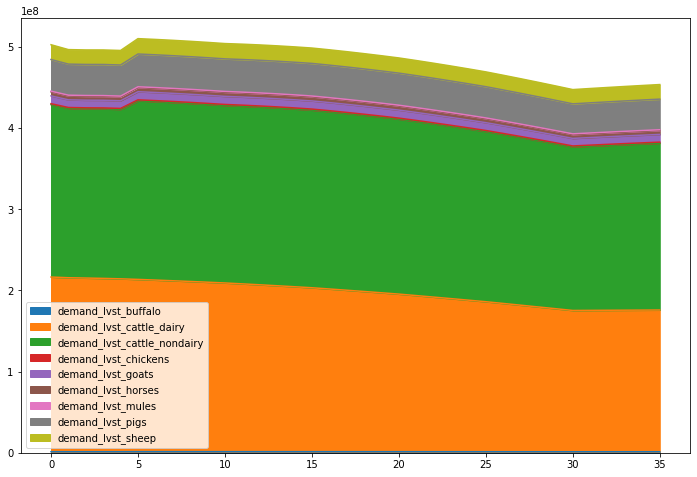

In [195]:
fig, ax = plt.subplots(figsize = (12, 8))
df_output_1[[x for x in df_output_1.columns if "demand_lvst" in x]].plot.area(ax = ax)

<AxesSubplot:>

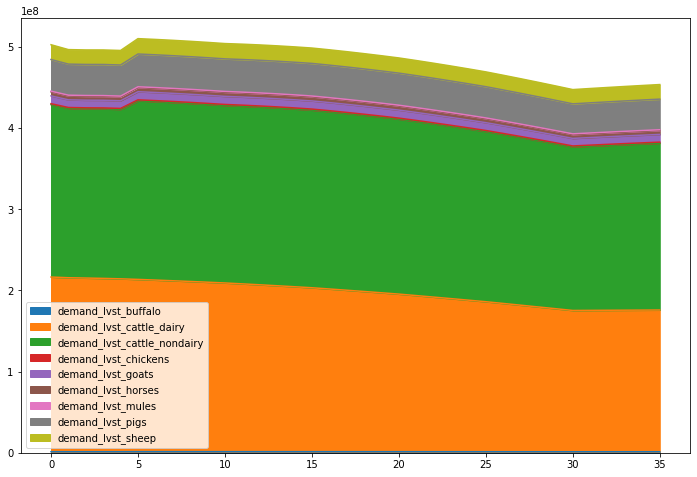

In [196]:
fig, ax = plt.subplots(figsize = (12, 8))
df_output_0[[x for x in df_output_0.columns if "demand_lvst" in x]].plot.area(ax = ax)

<AxesSubplot:>

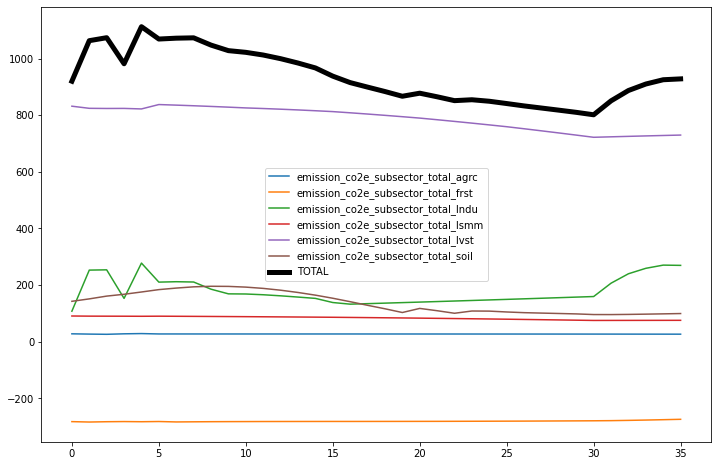

In [189]:
df_input_new_2 = df_input_new.copy()
df_input_new_2["lndu_reallocation_factor"] = 1
df_input_new_2["scalar_lvst_carrying_capacity"] = 1

fs_to_fp = 0.001
fields_mod = ["pij_lndu_croplands_to_forests_primary", "pij_lndu_grasslands_to_forests_primary", "pij_lndu_other_to_forests_primary"]
v1 = np.array(df_input_new_2[fields_mod]).sum(axis = 1) - fs_to_fp
df_input_new_2["pij_lndu_forests_secondary_to_forests_primary"] = fs_to_fp

for field in fields_mod:
    df_input_new_2[field] = 0


df_output_2 = model_afolu.project(df_input_new_2)
df_output_2[field_total] = df_output_2[fields_totals].sum(axis = 1)

fig, ax = plt.subplots(figsize = (12, 8))
df_output_2[fields_totals].plot(ax = ax)
df_output_2[[field_total]].plot(ax = ax, linewidth = 5, c = "black")


<AxesSubplot:>

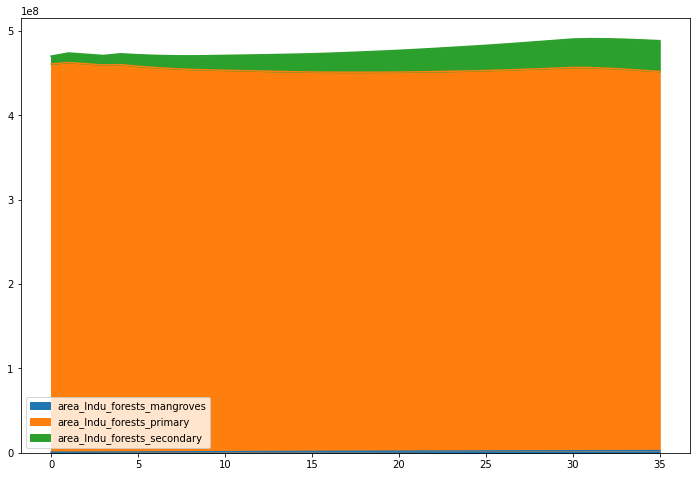

In [208]:
fig, ax = plt.subplots(figsize = (12, 8))
#df_output_2[[x for x in df_output_2.columns if ("area_lndu" in x) and ("conversion" not in x)]].plot.area(ax = ax)
df_output_1[[x for x in df_output_1.columns if ("area_lndu" in x) and ("conversion" not in x) and ("forests_" in x)]].plot.area(ax = ax)


<AxesSubplot:>

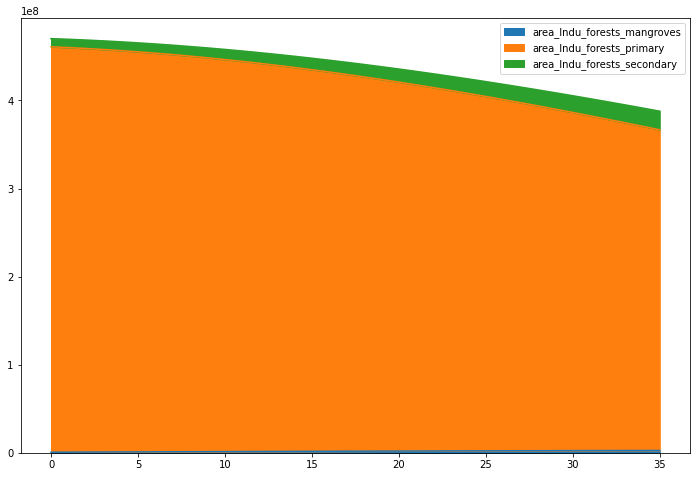

In [210]:
fig, ax = plt.subplots(figsize = (12, 8))
df_output_0[[x for x in df_output_1.columns if ("area_lndu" in x) and ("conversion" not in x) and ("forests_" in x)]].plot.area(ax = ax)


In [ ]:
df_input_new_1 = df_input_new.copy()
df_input_new_1["lndu_reallocation_factor"] = 1
df_input_new_1["scalar_lvst_carrying_capacity"] = 1
df_output_1 = model_afolu.project(df_input_new_1)
df_output_1[field_total] = df_output_1[fields_totals].sum(axis = 1)

fig, ax = plt.subplots(figsize = (12, 8))
df_output_1[fields_totals].plot(ax = ax)
df_output_1[[field_total]].plot(ax = ax, linewidth = 5, c = "black")

<AxesSubplot:>

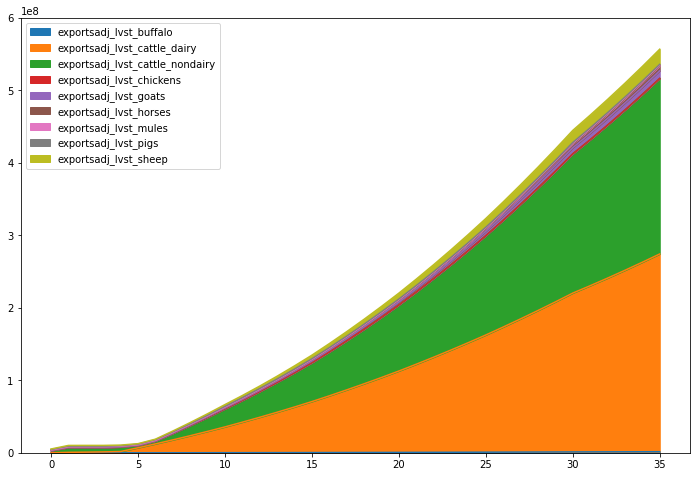

In [164]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.set_ylim(0, 6*(10**8))
sa.model_attributes.extract_model_variable(
    df_output_0,
    model_afolu.modvar_lvst_adjusted_equivalent_exports
).plot.area(ax = ax)


<AxesSubplot:>

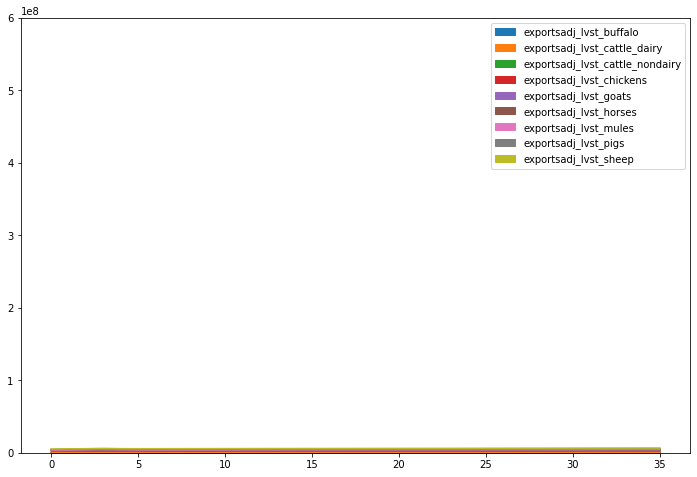

In [165]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.set_ylim(0, 6*(10**8))
sa.model_attributes.extract_model_variable(
    df_output_1,
    model_afolu.modvar_lvst_adjusted_equivalent_exports
).plot.area(ax = ax)

In [184]:
df_input_new_0["frac_gnrl_eating_red_meat"]

0     1.00
1     0.99
2     0.98
3     0.97
4     0.96
5     0.95
6     0.94
7     0.93
8     0.92
9     0.91
10    0.90
11    0.89
12    0.88
13    0.87
14    0.86
15    0.85
16    0.84
17    0.83
18    0.82
19    0.81
20    0.80
21    0.79
22    0.78
23    0.77
24    0.76
25    0.75
26    0.74
27    0.73
28    0.72
29    0.71
30    0.70
31    0.70
32    0.70
33    0.70
34    0.70
35    0.70
Name: frac_gnrl_eating_red_meat, dtype: float64

<AxesSubplot:>

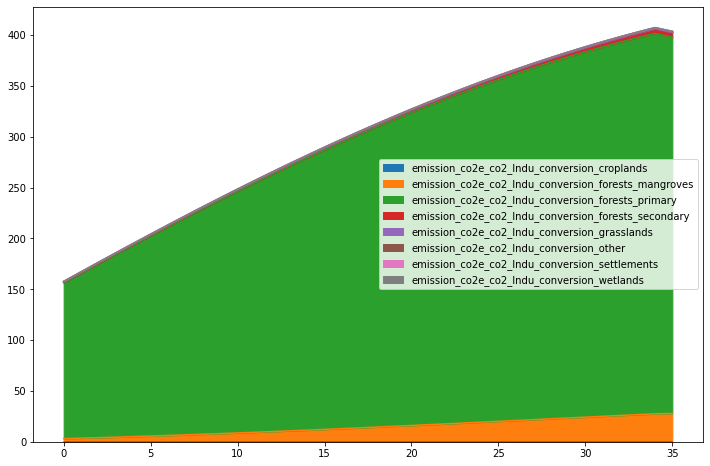

In [180]:
#df_input_new["lndu_reallocation_factor"]
#df_output["emission_co2e_subsector_total_lndu"].plot()
fig, ax = plt.subplots(figsize = (12, 8))
df_output_0[[x for x in df_output_0.columns if ("emission_co2e" in x) and ("conversion" in x)]].plot.area(ax = ax)


<AxesSubplot:>

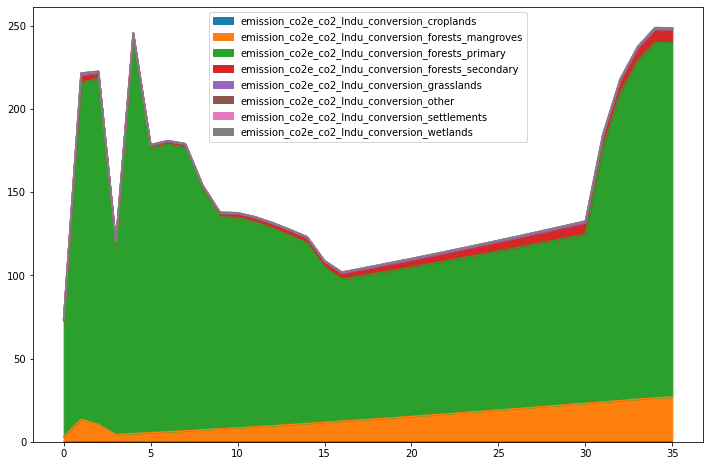

In [182]:
fig, ax = plt.subplots(figsize = (12, 8))
df_output_1[[x for x in df_output_1.columns if ("emission_co2e" in x) and ("conversion" in x)]].plot.area(ax = ax)


In [126]:
#df_output_0[[x for x in df_output_0.columns if "exportsadj_lvst_" in x]]
#df_output_0["area_lndu_grasslands"]
sa.model_attributes.extract_model_variable(
    df_input_new,
    model_afolu.modvar_agrc_frac_animal_feed
)

,frac_agrc_initial_yield_feed_bevs_and_spices,frac_agrc_initial_yield_feed_cereals,frac_agrc_initial_yield_feed_fibers,frac_agrc_initial_yield_feed_fruits,frac_agrc_initial_yield_feed_herbs_and_other_perennial_crops,frac_agrc_initial_yield_feed_nuts,frac_agrc_initial_yield_feed_other_annual,frac_agrc_initial_yield_feed_other_woody_perennial,frac_agrc_initial_yield_feed_pulses,frac_agrc_initial_yield_feed_rice,frac_agrc_initial_yield_feed_sugar_cane,frac_agrc_initial_yield_feed_tubers,frac_agrc_initial_yield_feed_vegetables_and_vines
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
#df_input_new_0[[x for x in df_input_new_0.columns if "carrying_capacity" in x]]

<AxesSubplot:>

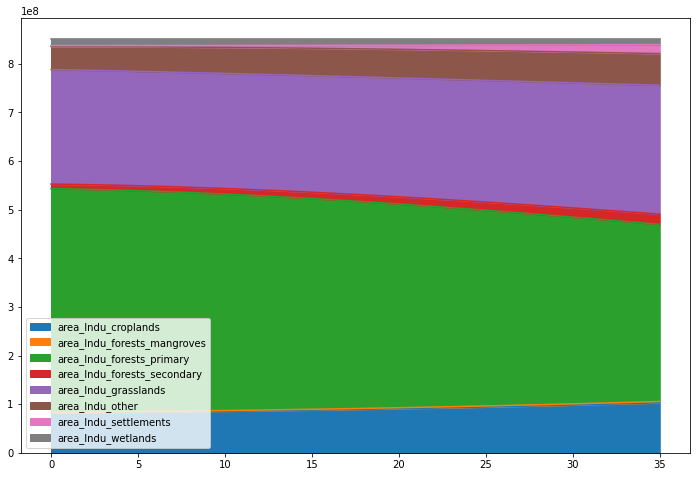

In [83]:
fig, ax = plt.subplots(figsize = (12, 8))
df_output_0[[x for x in df_output_0.columns if ("area_lndu" in x) and ("conversion" not in x)]].plot.area(ax = ax)

<AxesSubplot:>

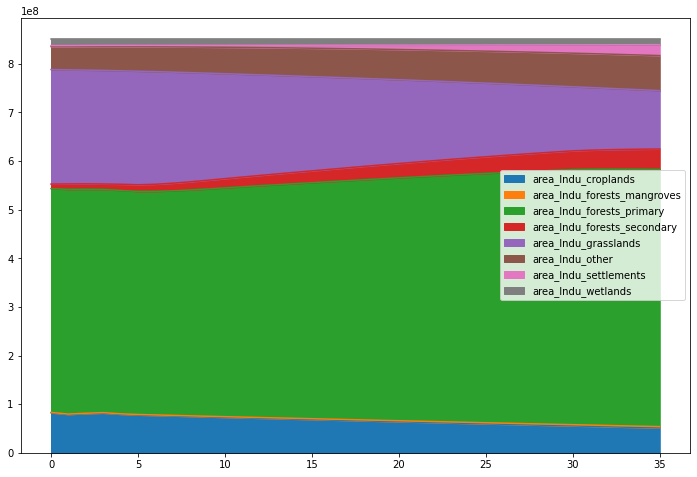

In [145]:
fig, ax = plt.subplots(figsize = (12, 8))
df_output_1[[x for x in df_output_1.columns if ("area_lndu" in x) and ("conversion" not in x)]].plot.area(ax = ax)

,emission_co2e_co2_frst_sequestration_mangroves,emission_co2e_co2_frst_sequestration_primary,emission_co2e_co2_frst_sequestration_secondary,emission_co2e_ch4_frst_methane_mangroves,emission_co2e_ch4_frst_methane_primary,emission_co2e_ch4_frst_methane_secondary,emission_co2e_co2_frst_forest_fires,emission_co2e_co2_frst_harvested_wood_products,emission_co2e_subsector_total_frst
0,-0.360812,-286.109968,-2.878176,0.018507,12.841092,0.258355,0.008730,-5.710546,-281.932817
1,-0.400421,-285.510257,-2.927481,0.020539,12.814176,0.262780,0.008740,-6.495613,-282.227535
2,-0.439733,-284.831933,-2.981239,0.022555,12.783732,0.267606,0.008751,-6.361504,-281.531764
3,-0.478740,-284.075788,-3.039396,0.024556,12.749795,0.272826,0.008762,-6.900781,-281.438766
4,-0.517433,-283.242699,-3.101892,0.026541,12.712405,0.278436,0.008773,-7.489657,-281.325526
5,-0.555782,-282.333591,-3.168658,0.028508,12.671602,0.284429,0.008785,-7.997129,-281.061835
6,-0.593771,-281.349447,-3.239617,0.030457,12.627432,0.290799,0.008797,-10.434831,-282.660182
7,-0.631360,-280.291338,-3.314687,0.032385,12.579943,0.297537,0.008809,-10.863737,-282.182449
8,-0.668568,-279.160333,-3.393779,0.034293,12.529181,0.304637,0.008821,-11.282875,-281.628623
9,-0.705364,-277.957585,-3.476794,0.036180,12.475200,0.312089,0.008833,-11.692336,-280.999777


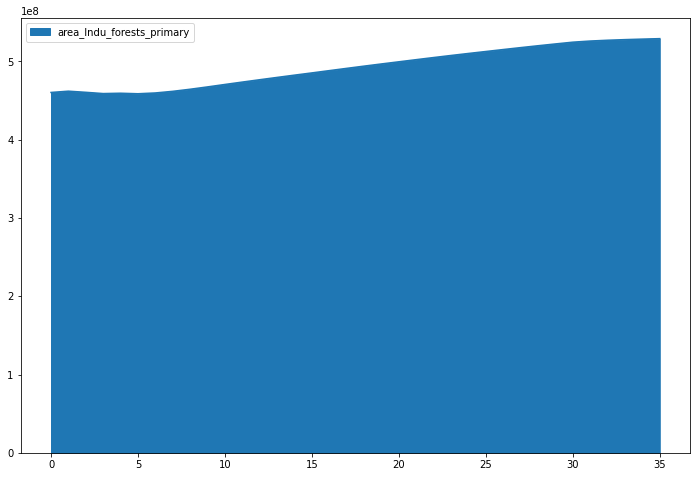

In [153]:
#df_input_new_0[[x for x in df_input_new_0.columns if x.startswith("pij_lndu") and x.endswith("to_forests_primary")]]
fig, ax = plt.subplots(figsize = (12, 8))
df_output_1[[x for x in df_output_1.columns if ("area_lndu" in x) and ("conversion" not in x) and ("forests_primary" in x)]].plot.area(ax = ax)
df_output_0[[
    x for x in df_output_0.columns if ("emission_co2e" in x) and ("frst" in x)
]]


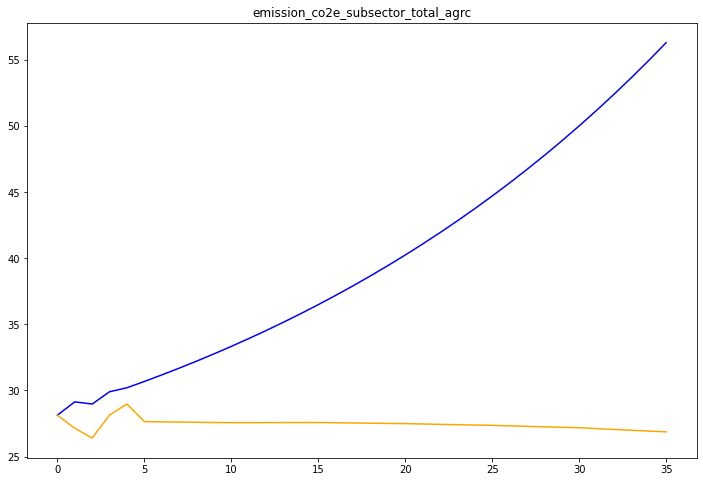

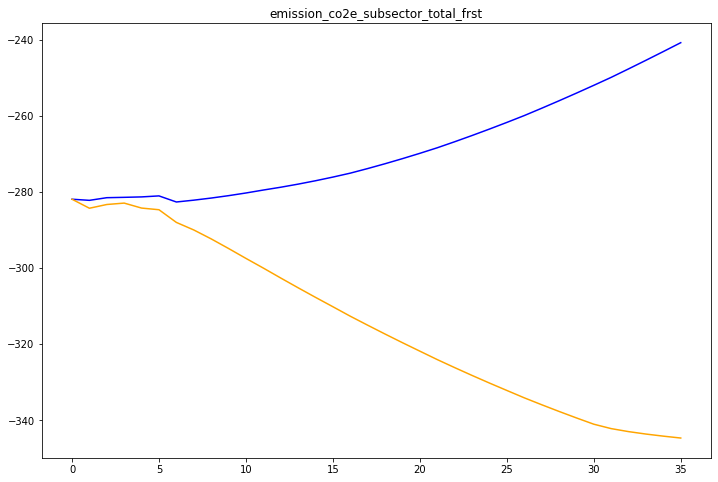

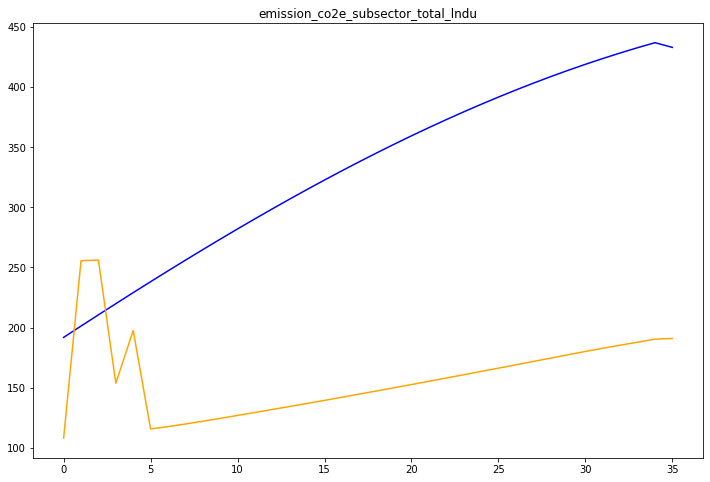

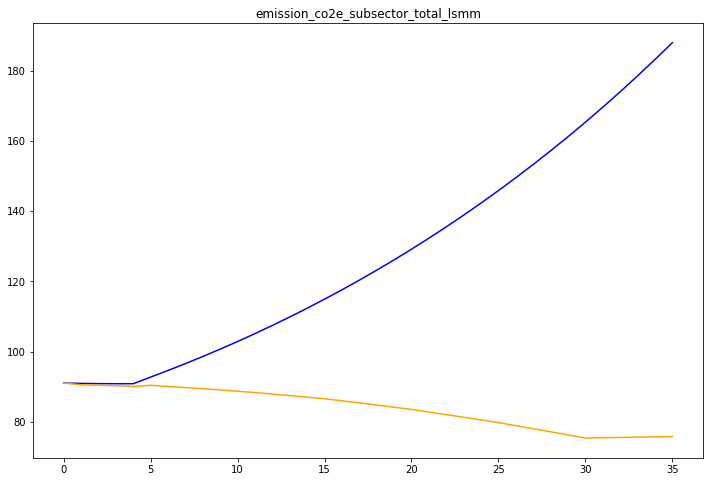

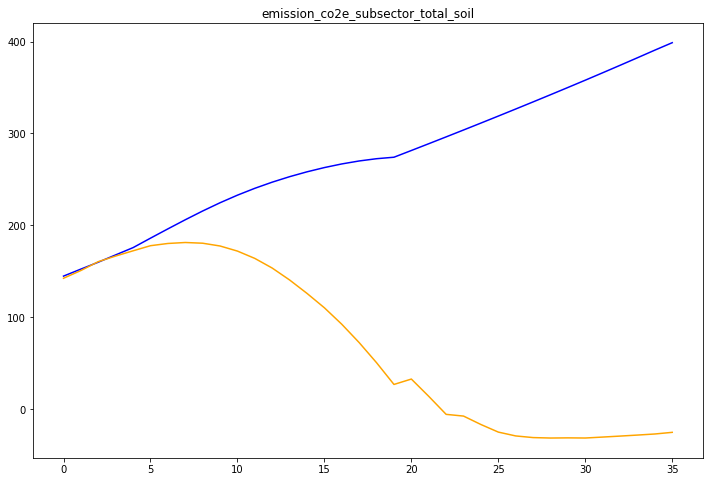

In [61]:

for field in fields_totals:
    fig, ax = plt.subplots(figsize = (12, 8))
    df_output_0[field].plot(ax = ax, c = "blue")
    df_output_1[field].plot(ax = ax, c = "orange")
    
    ax.set_title(field)
    

In [64]:
for k in df_input_new.columns:
    if df_input_new_0[k].iloc[0] != df_input_new_1[k].iloc[0]:
        print(k)

lndu_reallocation_factor


In [87]:
[x for x in df_input_new.columns if "carrying_capacity" in x]

['scalar_lvst_carrying_capacity']

In [17]:
df_input_0 = dict_dat[0].get("argentina")
df_input_20 = dict_dat[10].get("argentina")

cols_diff = []
for k in df_input_0.columns:
    if not all(df_input_0[k] == df_input_20[k]):
        print(k)
        cols_diff.append(k)

pij_lndu_croplands_to_croplands
pij_lndu_croplands_to_forests_mangroves
pij_lndu_croplands_to_forests_primary
pij_lndu_croplands_to_forests_secondary
pij_lndu_croplands_to_grasslands
pij_lndu_croplands_to_other
pij_lndu_forests_secondary_to_croplands
pij_lndu_forests_secondary_to_forests_secondary
pij_lndu_forests_secondary_to_grasslands


In [23]:
df_input_0[cols_diff].tail()

,pij_lndu_croplands_to_croplands,pij_lndu_croplands_to_forests_mangroves,pij_lndu_croplands_to_forests_primary,pij_lndu_croplands_to_forests_secondary,pij_lndu_croplands_to_grasslands,pij_lndu_croplands_to_other,pij_lndu_forests_secondary_to_croplands,pij_lndu_forests_secondary_to_forests_secondary,pij_lndu_forests_secondary_to_grasslands
31,0.994961,0.000149,0.003684,0.000126,0.000903,0.000177,0.006850,0.992792,0.000358
32,0.995072,0.000112,0.003683,0.000094,0.000907,0.000133,0.006968,0.992673,0.000359
33,0.995183,0.000074,0.003681,0.000063,0.000910,0.000088,0.007085,0.992554,0.000360
34,0.995293,0.000037,0.003680,0.000032,0.000913,0.000044,0.007203,0.992436,0.000362
35,0.995404,0.000000,0.003679,0.000000,0.000917,0.000000,0.007320,0.992317,0.000363


In [28]:
df_input_20[[x for x in df_input_20.columns if "exports_agrc" in x]]

,exports_agrc_bevs_and_spices_tonne,exports_agrc_cereals_tonne,exports_agrc_fibers_tonne,exports_agrc_fruits_tonne,exports_agrc_herbs_and_other_perennial_crops_tonne,exports_agrc_nuts_tonne,exports_agrc_other_annual_tonne,exports_agrc_other_woody_perennial_tonne,exports_agrc_pulses_tonne,exports_agrc_rice_tonne,exports_agrc_sugar_cane_tonne,exports_agrc_tubers_tonne,exports_agrc_vegetables_and_vines_tonne
0,1116672.941,18724961.12,153672.6017,1.008486e+06,43.001522,2751.870204,8009365.461,0.0,8.850742e+05,372882.5445,5.971137e+05,24640.57108,1253493.750
1,1115138.454,27784634.93,182435.9469,1.201261e+06,11.476985,1886.579969,7127013.253,0.0,8.191260e+05,704337.6714,2.341796e+06,59701.52673,2386697.304
2,1111439.566,22870291.79,115518.6466,1.081786e+06,1568.164121,2699.181761,6503332.170,0.0,1.355763e+06,571289.3614,9.203914e+05,34105.70816,1110299.246
3,1068495.114,23475210.11,318040.3118,9.977513e+05,0.000000,4273.538261,5755585.372,0.0,1.181555e+06,514009.0475,2.865873e+05,34682.07584,1335455.567
4,1062639.543,25386448.44,0.0000,8.202383e+05,2846.854600,4515.938675,5969051.645,0.0,1.171096e+06,637277.0270,0.000000e+00,52061.37635,2038246.637
5,1067952.741,25513380.68,0.0000,8.243395e+05,2861.088873,4538.518369,5998896.903,0.0,1.176951e+06,640463.4121,0.000000e+00,52321.68323,2048437.870
6,1073292.505,25640947.58,0.0000,8.284612e+05,2875.394317,4561.210961,6028891.388,0.0,1.182836e+06,643665.7292,0.000000e+00,52583.29165,2058680.059
7,1078658.967,25769152.32,0.0000,8.326035e+05,2889.771289,4584.017015,6059035.845,0.0,1.188750e+06,646884.0578,0.000000e+00,52846.20811,2068973.460
8,1084052.262,25897998.08,0.0000,8.367665e+05,2904.220145,4606.937101,6089331.024,0.0,1.194694e+06,650118.4781,0.000000e+00,53110.43915,2079318.327
9,1089472.523,26027488.07,0.0000,8.409503e+05,2918.741246,4629.971786,6119777.679,0.0,1.200668e+06,653369.0705,0.000000e+00,53375.99134,2089714.919


In [24]:
df_input_20[cols_diff].tail()

,pij_lndu_croplands_to_croplands,pij_lndu_croplands_to_forests_mangroves,pij_lndu_croplands_to_forests_primary,pij_lndu_croplands_to_forests_secondary,pij_lndu_croplands_to_grasslands,pij_lndu_croplands_to_other,pij_lndu_forests_secondary_to_croplands,pij_lndu_forests_secondary_to_forests_secondary,pij_lndu_forests_secondary_to_grasslands
31,0.973677,0.000611,0.015117,0.009267,0.000602,0.000726,0.001119,0.998823,0.000058
32,0.972174,0.000535,0.017650,0.008466,0.000540,0.000636,0.000871,0.999084,0.000045
33,0.970335,0.000429,0.021211,0.007064,0.000452,0.000510,0.000615,0.999354,0.000031
34,0.967904,0.000269,0.026587,0.004604,0.000317,0.000319,0.000349,0.999634,0.000018
35,0.964269,0.000000,0.035642,0.000000,0.000089,0.000000,0.000074,0.999923,0.000004


In [177]:
warnings.filterwarnings("ignore")
import model_afolu as mafl
import importlib
importlib.reload(mafl)
model_afolu_0 = mafl.AFOLU(sa.model_attributes)
model_afolu_20 = mafl.AFOLU(sa.model_attributes)

nation = "brazil"

df_out_0 = model_afolu_0.project(dict_dat[0][nation])
df_out_20 = model_afolu_20.project(dict_dat[20][nation])


In [174]:
#df_input_new_with_no_excess["frac_lndu_increasing_net_exports_met_grasslands"]
df_out_0[[x for x in df_out_0.columns if ("emission_co2e_subsector_" in x)]]




,emission_co2e_subsector_total_agrc,emission_co2e_subsector_total_frst,emission_co2e_subsector_total_lndu,emission_co2e_subsector_total_lsmm,emission_co2e_subsector_total_lvst,emission_co2e_subsector_total_soil
0,275.540656,-278.061279,191.285405,82.851665,790.419482,123.355401
1,275.938505,-277.889473,200.667763,94.230328,900.991580,133.703347
2,245.804646,-277.648167,209.982766,97.112758,929.658922,134.510136
3,253.093151,-277.328061,219.223249,100.119624,959.520731,137.792020
4,260.278731,-276.930105,228.382052,103.255010,990.616314,141.190555
5,267.352882,-276.455274,237.451762,106.523088,1022.985906,144.708904
6,274.313170,-275.904595,246.425420,109.855963,1054.319324,148.135220
7,281.150211,-275.536103,255.296060,113.332418,1087.050685,151.691962
8,287.862636,-275.088573,264.057158,116.956745,1121.221069,155.382806
9,294.442121,-274.563381,272.702029,120.733323,1156.872468,159.211083


In [172]:
df_out_20[[x for x in df_out_0.columns if ("emission_co2e_subsector_" in x)]]

,emission_co2e_subsector_total_agrc,emission_co2e_subsector_total_frst,emission_co2e_subsector_total_lndu,emission_co2e_subsector_total_lsmm,emission_co2e_subsector_total_lvst,emission_co2e_subsector_total_soil
0,275.540656,-278.061279,191.285405,82.851665,790.419482,123.355401
1,275.938505,-277.889473,200.667763,94.230328,900.991580,133.703347
2,245.804646,-277.648167,209.982766,97.112758,929.658922,134.510136
3,253.093151,-277.328061,219.223249,100.119624,959.520731,137.792020
4,260.278731,-276.930105,228.382052,103.255010,990.616314,141.190555
5,267.352882,-276.455274,237.451762,106.523088,1022.985906,144.708904
6,274.313170,-275.904595,246.425420,109.855963,1054.319324,148.135220
7,281.150211,-275.536103,255.296060,113.332418,1087.050685,151.691962
8,287.862636,-275.088573,264.057158,116.956745,1121.221069,155.382806
9,294.442121,-274.563381,272.702029,120.733323,1156.872468,159.211083


In [178]:
df_test = pd.read_csv("/Users/jsyme/Downloads/output_afolu_all_long.csv")



In [189]:
df_test[
    df_test["Nation"].isin(["brazil"]) &
    df_test["policy"].isin([0, 20]) & 
    df_test["variable"].isin(["emission_co2e_subsector_total_lndu"]) & 
    df_test["time_period"].isin([0, 35])
];

In [301]:
df_input_new["gdp_mmm_usd"].tail()

31    3577.850554
32    3637.747458
33    3697.644362
34    3757.541266
35    3817.438170
Name: gdp_mmm_usd, dtype: float64

In [319]:
np.array(df_tmp["scalar_lvst_carrying_capacity"]) - np.array(df_input_new["scalar_lvst_carrying_capacity"])



array([0.        , 0.01897507, 0.03832964, 0.0580713 , 0.07820779,
       0.07977195, 0.08136739, 0.08299474, 0.08465463, 0.08634772,
       0.08807468, 0.08983617, 0.0916329 , 0.09346555, 0.09533487,
       0.09724156, 0.09918639, 0.10117012, 0.10319352, 0.10525739,
       0.10736254, 0.10950979, 0.11169999, 0.11393399, 0.11621267,
       0.11853692, 0.12090766, 0.12332581, 0.12579233, 0.12830818,
       0.13087434, 0.13349183, 0.13616166, 0.1388849 , 0.14166259,
       0.14449585])

In [317]:
for k in df_tmp.columns:
    if k in df_input_new.columns:
        if df_input_new[k].dtype == float:
            v1 = np.array(df_input_new[k].iloc[10:-1])
            v2 = np.array(df_tmp[k].iloc[10:-1])

            if np.max(np.abs(v1 - v2)) > 10**(-6):
                print(k)

factor_lndu_soil_carbon_croplands
factor_lndu_soil_carbon_other
frac_agrc_bevs_and_spices_cl1_temperate
frac_agrc_bevs_and_spices_cl1_tropical
frac_agrc_bevs_and_spices_cl2_dry
frac_agrc_bevs_and_spices_cl2_wet
frac_agrc_cereals_cl1_temperate
frac_agrc_cereals_cl1_tropical
frac_agrc_cereals_cl2_dry
frac_agrc_cereals_cl2_wet
frac_agrc_fibers_cl1_temperate
frac_agrc_fibers_cl1_tropical
frac_agrc_fibers_cl2_dry
frac_agrc_fibers_cl2_wet
frac_agrc_fruits_cl1_temperate
frac_agrc_fruits_cl1_tropical
frac_agrc_fruits_cl2_dry
frac_agrc_fruits_cl2_wet
frac_agrc_herbs_and_other_perennial_crops_cl1_temperate
frac_agrc_herbs_and_other_perennial_crops_cl1_tropical
frac_agrc_herbs_and_other_perennial_crops_cl2_dry
frac_agrc_herbs_and_other_perennial_crops_cl2_wet
frac_agrc_nuts_cl1_temperate
frac_agrc_nuts_cl1_tropical
frac_agrc_nuts_cl2_dry
frac_agrc_nuts_cl2_wet
frac_agrc_other_annual_cl1_temperate
frac_agrc_other_annual_cl1_tropical
frac_agrc_other_annual_cl2_dry
frac_agrc_other_annual_cl2_wet
fra

In [312]:
df_input_new["population_gnrl_urban"].dtype == str

False